In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install wordcloud -q

In [3]:
df = pd.read_csv("IMDB_Dataset.csv")

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.sentiment.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [7]:
df[df["sentiment"] == "positive"]

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
...,...,...
49983,"I loved it, having been a fan of the original ...",positive
49985,Imaginary Heroes is clearly the best film of t...,positive
49989,I got this one a few weeks ago and love it! It...,positive
49992,John Garfield plays a Marine who is blinded by...,positive


## Preprocessing

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reiseren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def clean_text(text):
    text = re.sub('<[^>]*>', '', text) # remove HTML tags
    text = re.sub('\d+', '', text) # remove numbers
    text = re.sub(r'[^\w\s\n\r]', '', text).lower() # first r is raw string indicator, remove punctation beside keep \n\r chars and lower case
    words = re.split(r'(\s+)', text)
    filtered_text = [word for word in words if word not in english_stopwords]
    text = ' '.join(filtered_text)
    text = re.sub(' +', ' ', text) # remove punctuation
    text = text.strip()
    return text

In [10]:
pos_review = df[df["sentiment"] == "positive"]["review"]
neg_review = df[df["sentiment"] == "negative"]["review"]

In [11]:
df["review"].iloc[:3]

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
Name: review, dtype: object

In [12]:
len(df["review"])

50000

In [13]:
df["review_cleaned"] = df["review"].apply(clean_text)

In [14]:
len(df["review_cleaned"])

50000

In [15]:
df["review_cleaned"].iloc[:3][1]

'wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating every surface terribly well done'

In [16]:
combined_sentiment = ' '.join(df["sentiment"])
combined_sentiment = clean_text(combined_sentiment)

In [17]:
combined_pos_string = ' '.join(pos_review[0:1000])
combined_pos_string = clean_text(combined_pos_string)
print(combined_pos_string)

one reviewers mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle cla

In [18]:
combined_neg_string = ' '.join(neg_review[0:1000])
combined_neg_string = clean_text(combined_neg_string)
print(combined_neg_string)

basically theres family little boy jake thinks theres zombie closet parents fighting timethis movie slower soap opera suddenly jake decides become rambo kill zombieok first youre going make film must decide thriller drama drama movie watchable parents divorcing arguing like real life jake closet totally ruins film expected see boogeyman similar movie instead watched drama meaningless thriller spots well playing parents descent dialogs shots jake ignore show amazing fresh innovative idea first aired first years brilliant things dropped show really funny anymore continued decline complete waste time todayits truly disgraceful far show fallen writing painfully bad performances almost bad mildly entertaining respite guesthosts show probably wouldnt still air find hard believe creator handselected original cast also chose band hacks followed one recognize brilliance see fit replace mediocrity felt must give stars respect original cast made show huge success show awful cant believe still air

In [19]:
from collections import Counter
words = re.findall(r'\b\w+\b', (combined_pos_string+combined_neg_string).lower())
# En sık geçen 3 kelimeyi bulun
most_common_words = Counter(words).most_common(10)
print(f"most_common_words : {most_common_words}")

most_common_words : [('movie', 3378), ('film', 2885), ('one', 1915), ('like', 1489), ('good', 1097), ('even', 992), ('would', 981), ('see', 939), ('really', 884), ('story', 863)]


In [20]:
most_common_words_list = list(map(lambda x: x[0], most_common_words))
print(most_common_words_list)

['movie', 'film', 'one', 'like', 'good', 'even', 'would', 'see', 'really', 'story']


In [21]:
def remove_words_from_string(text, words_to_remove):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in map(str.lower, words_to_remove)]
    return ' '.join(filtered_words)

In [22]:
combined_pos_string = remove_words_from_string(combined_pos_string, most_common_words_list)
combined_neg_string = remove_words_from_string(combined_neg_string, most_common_words_list)

# Visualization

<Axes: xlabel='sentiment', ylabel='count'>

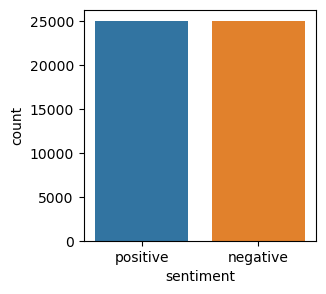

In [23]:
plt.figure(figsize = (3,3))
sns.countplot(df, x="sentiment", hue="sentiment")

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def createWordCloud(all_text, title:str):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

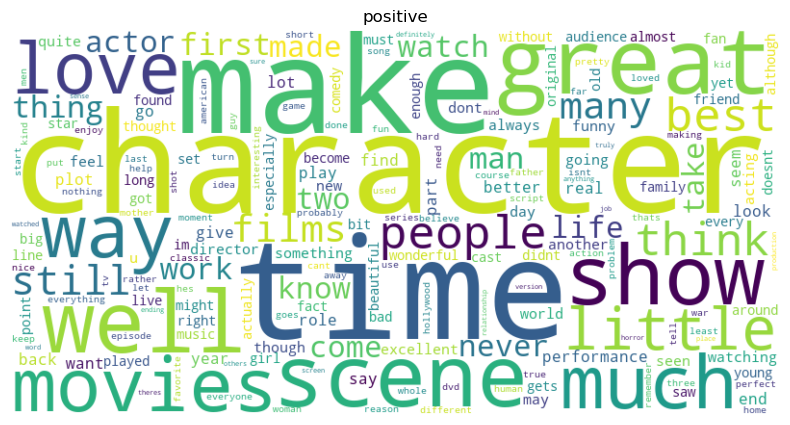

In [25]:
createWordCloud(combined_pos_string, "positive")

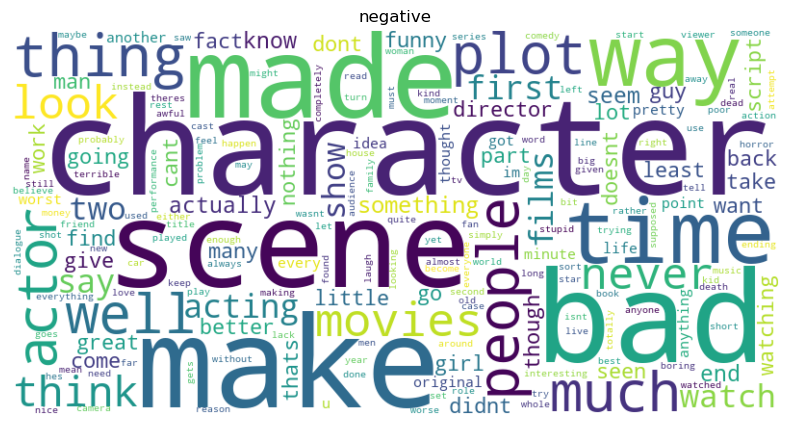

In [26]:
createWordCloud(combined_neg_string, "negative")

In [27]:
pos_review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [28]:
pos_review = pos_review.apply(clean_text)
neg_review = neg_review.apply(clean_text)

In [29]:
all_review = '\n'.join(pos_review[0:1000]) + '\n' +'\n'.join(neg_review[0:1000])

In [30]:
all_review

'one reviewers mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle cl

In [31]:
all_words = all_review.split()

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

tokenizer = Tokenizer()
tokenizer.fit_on_texts([all_review])
tokenizer.word_index

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'even': 6,
 'would': 7,
 'see': 8,
 'really': 9,
 'story': 10,
 'time': 11,
 'get': 12,
 'much': 13,
 'well': 14,
 'bad': 15,
 'also': 16,
 'movies': 17,
 'great': 18,
 'people': 19,
 'first': 20,
 'dont': 21,
 'way': 22,
 'made': 23,
 'make': 24,
 'characters': 25,
 'films': 26,
 'watch': 27,
 'plot': 28,
 'think': 29,
 'could': 30,
 'many': 31,
 'little': 32,
 'never': 33,
 'seen': 34,
 'character': 35,
 'two': 36,
 'best': 37,
 'acting': 38,
 'know': 39,
 'ever': 40,
 'love': 41,
 'scene': 42,
 'life': 43,
 'better': 44,
 'show': 45,
 'go': 46,
 'say': 47,
 'man': 48,
 'scenes': 49,
 'still': 50,
 'something': 51,
 'real': 52,
 'end': 53,
 'back': 54,
 'watching': 55,
 'actors': 56,
 'funny': 57,
 'doesnt': 58,
 'im': 59,
 'going': 60,
 'didnt': 61,
 'new': 62,
 'find': 63,
 'actually': 64,
 'thing': 65,
 'years': 66,
 'makes': 67,
 'want': 68,
 'old': 69,
 'though': 70,
 'cant': 71,
 'work': 72,
 'another': 73,
 'part': 7

In [33]:
tokenizer.index_word

{1: 'movie',
 2: 'film',
 3: 'one',
 4: 'like',
 5: 'good',
 6: 'even',
 7: 'would',
 8: 'see',
 9: 'really',
 10: 'story',
 11: 'time',
 12: 'get',
 13: 'much',
 14: 'well',
 15: 'bad',
 16: 'also',
 17: 'movies',
 18: 'great',
 19: 'people',
 20: 'first',
 21: 'dont',
 22: 'way',
 23: 'made',
 24: 'make',
 25: 'characters',
 26: 'films',
 27: 'watch',
 28: 'plot',
 29: 'think',
 30: 'could',
 31: 'many',
 32: 'little',
 33: 'never',
 34: 'seen',
 35: 'character',
 36: 'two',
 37: 'best',
 38: 'acting',
 39: 'know',
 40: 'ever',
 41: 'love',
 42: 'scene',
 43: 'life',
 44: 'better',
 45: 'show',
 46: 'go',
 47: 'say',
 48: 'man',
 49: 'scenes',
 50: 'still',
 51: 'something',
 52: 'real',
 53: 'end',
 54: 'back',
 55: 'watching',
 56: 'actors',
 57: 'funny',
 58: 'doesnt',
 59: 'im',
 60: 'going',
 61: 'didnt',
 62: 'new',
 63: 'find',
 64: 'actually',
 65: 'thing',
 66: 'years',
 67: 'makes',
 68: 'want',
 69: 'old',
 70: 'though',
 71: 'cant',
 72: 'work',
 73: 'another',
 74: 'part

In [34]:
total_words = len(tokenizer.word_index)+1 # np.max(list(tokenizer.word_index.values())) + 1
total_words

31067

In [35]:
lines = re.split(r'\n', all_review)
token_list = []
for line in lines:
    token_list.append(tokenizer.texts_to_sequences([line])[0])
token_list = [i for i in token_list if i != []]
print(len(lines))

2000


In [36]:
print(token_list[:2])

[[3, 1484, 731, 55, 2983, 289, 327, 2268, 115, 492, 630, 4760, 20, 65, 2777, 2983, 6400, 9837, 49, 392, 181, 115, 336, 46, 1830, 45, 6401, 6402, 9838, 45, 3214, 4287, 3490, 808, 286, 392, 2591, 246, 212, 14112, 311, 2983, 7734, 220, 6403, 3215, 2984, 1387, 14113, 2269, 1042, 14114, 424, 4761, 3491, 958, 4288, 3858, 4289, 279, 14115, 14116, 257, 7735, 3216, 424, 216, 14117, 4762, 14118, 7736, 4763, 5454, 2127, 14119, 14120, 295, 6404, 3859, 5455, 7737, 9839, 33, 144, 14121, 7, 47, 169, 1102, 45, 472, 107, 168, 166, 450, 1831, 631, 84, 1485, 3492, 2128, 901, 631, 1388, 631, 14122, 58, 984, 85, 20, 289, 40, 113, 2777, 1043, 1745, 290, 47, 1103, 204, 1104, 1237, 2983, 87, 4764, 257, 2013, 2014, 392, 392, 6405, 5456, 4290, 9840, 2015, 14123, 7738, 9840, 442, 516, 12, 146, 14, 7739, 649, 659, 7738, 632, 958, 14124, 472, 374, 883, 1832, 958, 432, 55, 2983, 100, 322, 2413, 3860, 14125, 12, 1133, 4765, 410], [228, 32, 262, 1279, 2129, 14126, 14127, 1160, 296, 9841, 517, 7740, 170, 1746, 339, 25

In [37]:
max_length = max(len(sublist) for sublist in token_list)
lengths = [len(sublist) for sublist in token_list]
average_length = int(np.round(sum(lengths) / len(lengths), decimals=0))
min_length = min(len(sublist) for sublist in token_list)
print(f"En uzun alt listenin uzunluğu: {max_length} ortalama uzunluk : {average_length} en kısa alt listenin uzunluğu: {min_length}")

En uzun alt listenin uzunluğu: 708 ortalama uzunluk : 116 en kısa alt listenin uzunluğu: 8


In [38]:
from tensorflow.keras.preprocessing import sequence

max_len=500
X=sequence.pad_sequences(token_list, maxlen=max_len)
X

array([[    0,     0,     0, ...,  1133,  4765,   410],
       [    0,     0,     0, ...,  2987,    14,   101],
       [    0,     0,     0, ...,    46,     8,   287],
       ...,
       [    0,     0,     0, ...,    11,  1433,     4],
       [    0,     0,     0, ...,  5237, 13169,  3257],
       [    0,     0,     0, ...,  1281,  3475,  3101]])

In [39]:
print(X[0])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [40]:
max_features = 50000 # take into account most often max_features word
## Train Simple RNN
model=Sequential()
model.add(Embedding(max_features,64,input_length=max_len)) ## Embedding Layers
model.add(SimpleRNN(128,activation='relu'))
model.add(Dense(1,activation="sigmoid"))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 64)           3200000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               24704     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 3,224,833
Trainable params: 3,224,833
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.BinaryAccuracy()])

In [43]:
## Create an instance of EarlyStoppping Callback
from tensorflow.keras.callbacks import EarlyStopping
earlystopping=EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
earlystopping

In [44]:
X

array([[    0,     0,     0, ...,  1133,  4765,   410],
       [    0,     0,     0, ...,  2987,    14,   101],
       [    0,     0,     0, ...,    46,     8,   287],
       ...,
       [    0,     0,     0, ...,    11,  1433,     4],
       [    0,     0,     0, ...,  5237, 13169,  3257],
       [    0,     0,     0, ...,  1281,  3475,  3101]])

In [45]:
y = np.concatenate((np.ones(1000), np.zeros(1000)))
y

array([1., 1., 1., ..., 0., 0., 0.])

In [46]:
shuffled_indices = np.random.permutation(len(X))
shuffled_X = X[shuffled_indices]
y = y[shuffled_indices]
print(shuffled_indices)

[1677  524 1022 ... 1779 1492  225]


In [47]:
shuffled_X

array([[    0,     0,     0, ...,  1661,  2476,     8],
       [    0,     0,     0, ...,    17,   234,   448],
       [    0,     0,     0, ...,  1178,  2634,  3727],
       ...,
       [    0,     0,     0, ..., 29245,     7, 13625],
       [    0,     0,     0, ...,   876,   890,  5224],
       [    0,     0,     0, ...,   628,    14,   161]])

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(shuffled_X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
## Train the model with early sstopping
history=model.fit(
    X_train,y_train,epochs=10,batch_size=32,
    validation_split=0.2,
    callbacks=[earlystopping]
)

Epoch 1/10
40/40 [==============================] - 6s 134ms/step - loss: 0.6931 - binary_accuracy: 0.4930 - val_loss: 0.6913 - val_binary_accuracy: 0.5031
Epoch 2/10
40/40 [==============================] - 5s 125ms/step - loss: 1.6760 - binary_accuracy: 0.7594 - val_loss: 0.6763 - val_binary_accuracy: 0.6187
Epoch 3/10
40/40 [==============================] - 5s 128ms/step - loss: 0.5679 - binary_accuracy: 0.9344 - val_loss: 0.6347 - val_binary_accuracy: 0.6438
Epoch 4/10
40/40 [==============================] - 5s 131ms/step - loss: 0.3940 - binary_accuracy: 0.9125 - val_loss: 0.6376 - val_binary_accuracy: 0.6531
Epoch 5/10
40/40 [==============================] - 5s 127ms/step - loss: 0.2822 - binary_accuracy: 0.9680 - val_loss: 0.7401 - val_binary_accuracy: 0.5969
Epoch 6/10
40/40 [==============================] - 6s 140ms/step - loss: 0.1247 - binary_accuracy: 0.9852 - val_loss: 0.6763 - val_binary_accuracy: 0.6313
Epoch 7/10
40/40 [==============================] - 6s 153ms/ste

In [50]:
X_train[30]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [51]:
## Save model file
model.save('imdb_rnn.h5')

In [52]:
# end